In [2]:
import pandas as pd 

In [3]:
import numpy as np 

In [4]:
import matplotlib.pyplot as plt 

In [5]:
import seaborn as sns 

In [7]:
violence = pd.read_csv('violence_against_women.csv') 

In [8]:
contraceptive = pd.read_csv('contraceptive.csv', encoding='iso-8859-1') 

In [10]:
contracept_sorted = contraceptive.sort_values(by='Percentage distribution of women aged 15-49  (per country)', ascending=False) 

In [12]:
violence_sorted = violence.sort_values(by='Value', ascending=False)  

In [14]:
contracept_sorted.isnull().values.any() 

False

In [15]:
violence_sorted.isnull().values.any() 

True

In [17]:
violence_sorted.fillna(0)  

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
66,351,Afghanistan,F,Employment,Employed for kind,... for at least one specific reason,01/01/2015,86.9
7783,394,Morocco,F,Employment,Employed for kind,... for at least one specific reason,01/01/2003,86.1
11023,412,Timor-Leste,F,Employment,Employed for kind,... for at least one specific reason,01/01/2016,85.2
7423,392,Mali,F,Employment,Employed for kind,... for at least one specific reason,01/01/2018,83.3
3666,371,Eritrea,F,Employment,Employed for kind,... for at least one specific reason,01/01/2002,82.8
...,...,...,...,...,...,...,...,...
12235,208,Yemen,M,Residence,Urban,... if she goes out without telling him,01/01/2013,0.0
12236,278,Yemen,M,Residence,Rural,... if she neglects the children,01/01/2013,0.0
12237,278,Yemen,M,Residence,Urban,... if she neglects the children,01/01/2013,0.0
12238,348,Yemen,M,Residence,Rural,... if she refuses to have sex with him,01/01/2013,0.0


In [18]:
violence_sorted.head() 

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
66,351,Afghanistan,F,Employment,Employed for kind,... for at least one specific reason,01/01/2015,86.9
7783,394,Morocco,F,Employment,Employed for kind,... for at least one specific reason,01/01/2003,86.1
11023,412,Timor-Leste,F,Employment,Employed for kind,... for at least one specific reason,01/01/2016,85.2
7423,392,Mali,F,Employment,Employed for kind,... for at least one specific reason,01/01/2018,83.3
3666,371,Eritrea,F,Employment,Employed for kind,... for at least one specific reason,01/01/2002,82.8


In [19]:
contracept_sorted.head() 
 

,Continent,Sub-Continent,Country,Percentage distribution of women aged 15-49 (per country),Pregnancy intention,Contraceptive availability,Contraceptive method
144,Africa,Western Africa,Gambia,0.767790,Not wanting to avoid pregancy,Not applicable,Not applicable
384,Asia,Western Asia,Oman,0.763389,Not wanting to avoid pregancy,Not applicable,Not applicable
336,Asia,Southeast Asia,Timor-Leste,0.761478,Not wanting to avoid pregancy,Not applicable,Not applicable
84,Africa,Middle Africa,Chad,0.760539,Not wanting to avoid pregancy,Not applicable,Not applicable
444,Oceania,Polynesia,French Polynesia,0.760404,Not wanting to avoid pregancy,Not applicable,Not applicable


<AxesSubplot:xlabel='Continent'>

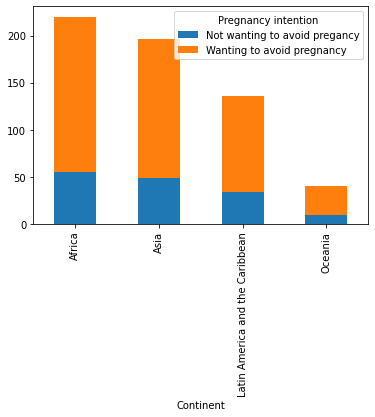

In [20]:
grouped = contraceptive.groupby(['Continent', 'Pregnancy intention']).size().unstack() 

grouped.plot(kind='bar', stacked=True) 

In [21]:
pregnancy_counts = contraceptive['Pregnancy intention'].value_counts() 

In [22]:
contraceptive_counts = contraceptive['Contraceptive availability'].value_counts() 

In [23]:
plt.figure(figsize=(10, 6)) 

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

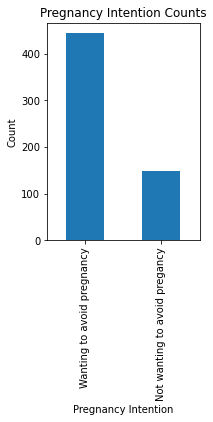

In [24]:
plt.subplot(1, 2, 1) 

pregnancy_counts.plot(kind='bar') 

plt.title('Pregnancy Intention Counts') 

plt.xlabel('Pregnancy Intention') 

plt.ylabel('Count') 

plt.show() 

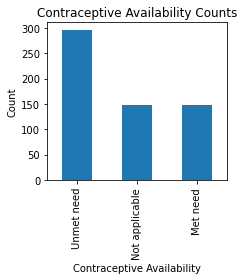

In [25]:
plt.subplot(1, 2, 2) 

contraceptive_counts.plot(kind='bar') 

plt.title('Contraceptive Availability Counts') 

plt.xlabel('Contraceptive Availability') 

plt.ylabel('Count') 

plt.tight_layout() 

plt.show() 

In [26]:
age_demographics = violence_sorted[violence_sorted['Demographics Question'].str.contains('age', case=False)] 

In [27]:
response_counts = age_demographics['Demographics Response'].value_counts() 

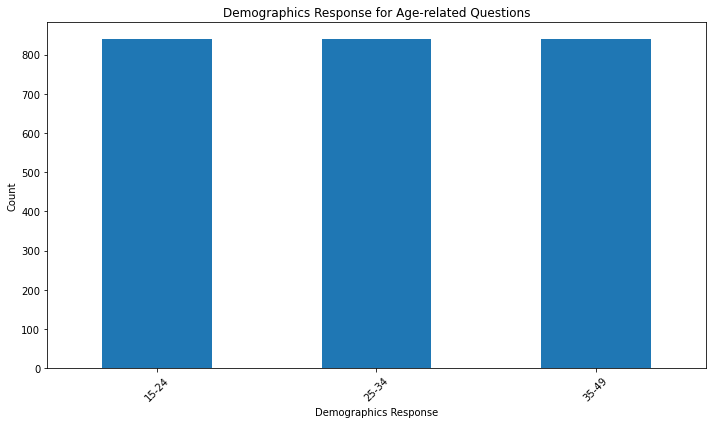

In [28]:
plt.figure(figsize=(10, 6)) 

response_counts.plot(kind='bar') 

plt.title('Demographics Response for Age-related Questions') 

plt.xlabel('Demographics Response') 

plt.ylabel('Count') 

plt.xticks(rotation=45) 

plt.tight_layout() 

plt.show() 

In [29]:
highest_value_country = violence_sorted.loc[violence_sorted['Value'].idxmax(), 'Country'] 
 

In [30]:
lowest_value_country = violence_sorted.loc[violence_sorted['Value'].idxmin(), 'Country'] 

In [31]:
print(f"The country with the highest value, which means most violent country for women, is : {highest_value_country}") 

The country with the highest value, which means most violent country for women, is : Afghanistan


In [32]:
print(f"The country with the lowest value, which means safest country for women, is: {lowest_value_country}") 

The country with the lowest value, which means safest country for women, is: Cambodia


In [33]:
median_value = violence_sorted['Value'].median() 

In [34]:
middle_country = violence_sorted.loc[ 

    violence_sorted['Value'].sub(median_value).abs().idxmin(), 

    'Country' 

] 

In [35]:
print(f"The country closest to the median value is: {middle_country}") 

The country closest to the median value is: Namibia


In [36]:
filtered_df = violence_sorted[ 

    (violence_sorted['Demographics Response'] == 'No education') | 

    (violence_sorted['Demographics Response'] == 'Higher') 

] 

In [37]:
filtered_df = filtered_df.dropna(subset=['Value']) 

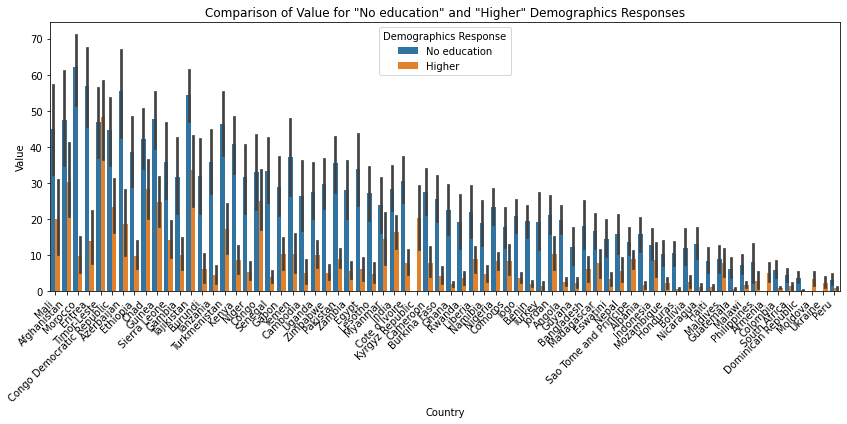

In [38]:
plt.figure(figsize=(12, 6)) 

sns.barplot(data=filtered_df, x='Country', y='Value', hue='Demographics Response') 

plt.title('Comparison of Value for "No education" and "Higher" Demographics Responses') 

plt.xlabel('Country') 

plt.ylabel('Value') 

plt.xticks(rotation=45, ha='right') 

plt.tight_layout() 

plt.show() 



In [39]:
filtered_df = violence_sorted[ 

    (violence_sorted['Demographics Response'] == 'Unemployed') | 

    (violence_sorted['Demographics Response'] == 'Employed for cash') | 

    (violence_sorted['Demographics Response'] == 'Employed for kind') | 

    (violence_sorted['Demographics Response'] == 'No education')  # Add missing value 

] 

In [40]:
custom_palette = { 

    'Unemployed': 'orange', 

    'Employed for cash': 'green', 

    'Employed for kind': 'pink', 

    'No education': 'blue'  # Adjust color and label as needed 

} 

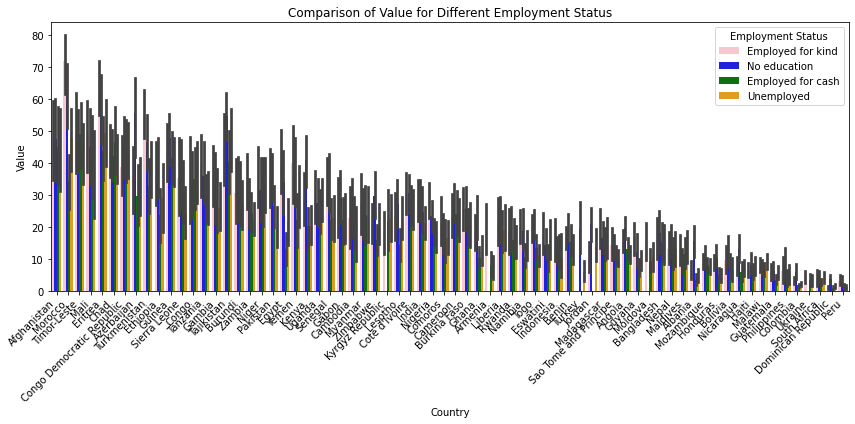

In [41]:
plt.figure(figsize=(12, 6)) 

sns.barplot( 

    data=filtered_df, 

    x='Country', 

    y='Value', 

    hue='Demographics Response', 

    palette=custom_palette 

) 

plt.title('Comparison of Value for Different Employment Status') 

plt.xlabel('Country') 

plt.ylabel('Value') 

plt.xticks(rotation=45, ha='right') 

plt.tight_layout() 

plt.legend(title='Employment Status') 

plt.show() 

In [42]:
countries_list = violence_sorted['Country'].unique() 

In [43]:
print(countries_list) 

['Afghanistan' 'Morocco' 'Timor-Leste' 'Mali' 'Eritrea' 'Chad'
 'Congo Democratic Republic' 'Azerbaijan' 'Gambia' 'Turkmenistan'
 'Ethiopia' 'Guinea' 'Sierra Leone' 'Tajikistan' 'Burundi' 'Congo'
 'Tanzania' 'Zambia' 'Niger' 'Pakistan' 'Egypt' 'Kyrgyz Republic' 'Yemen'
 'Myanmar' 'Gabon' 'Kenya' 'Uganda' 'Senegal' 'Cambodia' 'Zimbabwe'
 'Cameroon' "Cote d'Ivoire" 'Lesotho' 'India' 'Nigeria' 'Comoros'
 'Liberia' 'Burkina Faso' 'Ghana' 'Armenia' 'Rwanda' 'Jordan' 'Moldova'
 'Namibia' 'Indonesia' 'Eswatini' 'Nepal' 'Togo' 'Angola' 'Benin' 'Turkey'
 'Madagascar' 'Sao Tome and Principe' 'Guyana' 'Bangladesh' 'Albania'
 'Maldives' 'Mozambique' 'Honduras' 'Bolivia' 'Nicaragua' 'Haiti'
 'Ukraine' 'Malawi' 'Guatemala' 'Philippines' 'South Africa' 'Colombia'
 'Dominican Republic' 'Peru']


In [44]:
islam_countries = ['Afghanistan', 'Morocco', 'Mali', 'Eritrea', 'Chad', 'Azerbaijan', 'Gambia', 'Turkmenistan', 'Ethiopia', 'Guinea', 'Sierra Leone', 'Tajikistan', 'Pakistan', 'Egypt', 'Kyrgyz Republic', 'Yemen', 'Gabon', 'Kenya', 'Uganda', 'Senegal', 'Comoros', "Cote d'Ivoire", 'Niger', 'Somalia'] 

christianity_countries = ['Timor-Leste', 'Congo Democratic Republic', 'Congo', 'Tanzania', 'Zambia', 'Burundi', 'Lesotho', 'Nigeria', 'Liberia', 'Burkina Faso', 'Ghana', 'Armenia', 'Rwanda', 'Namibia', 'Sao Tome and Principe', 'Guyana', 'Albania', 'Maldives', 'Honduras', 'Nicaragua', 'Dominican Republic', 'Peru'] 

hinduism_countries = ['Nepal'] 

buddhism_countries = ['Myanmar', 'Cambodia'] 

african_traditional_countries = ['Zimbabwe', 'Cameroon', 'Kenya', 'Uganda', 'South Africa'] 

multiple_religions_countries = ['India', 'Indonesia', 'Togo', 'Bangladesh', 'Mozambique', 'Turkey', 'Madagascar', 'Benin', 'Angola', 'Philippines', 'Colombia', 'Malawi', 'Guatemala', 'Haiti', 'Bolivia', 'Nicaragua', 'Haiti', 'Bolivia', 'South Africa'] 

In [45]:
categories_df = pd.DataFrame({ 

    'Country': islam_countries + christianity_countries + hinduism_countries + 

               buddhism_countries + african_traditional_countries + multiple_religions_countries, 

    'Religion': (['Islam'] * len(islam_countries)) + 

                (['Christianity'] * len(christianity_countries)) + 

                (['Hinduism'] * len(hinduism_countries)) + 

                (['Buddhism'] * len(buddhism_countries)) + 

                (['African Traditional'] * len(african_traditional_countries)) + 

                (['Multiple Religions'] * len(multiple_religions_countries)) 

}) 

In [46]:
merged_df = pd.merge(categories_df, violence_sorted, on='Country', how='left') 

In [47]:
grouped_df = merged_df.groupby('Religion')['Value'].sum().reset_index() 

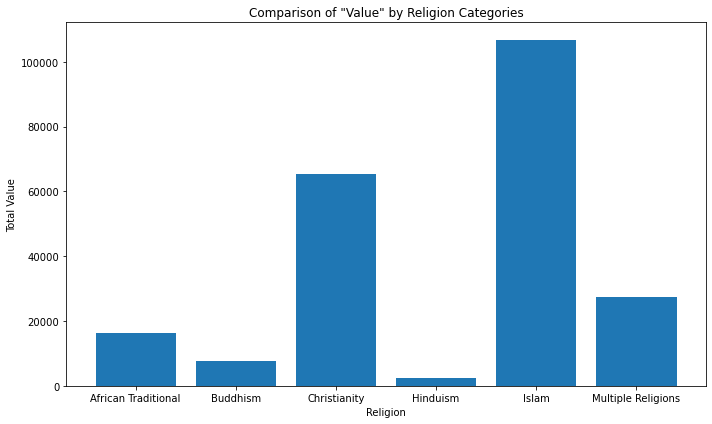

In [48]:
plt.figure(figsize=(10, 6)) 

plt.bar(grouped_df['Religion'], grouped_df['Value']) 

plt.title('Comparison of "Value" by Religion Categories') 

plt.xlabel('Religion') 

plt.ylabel('Total Value') 

plt.tight_layout() 

plt.show() 

In [49]:
islam_countries = ['Afghanistan', 'Morocco', 'Mali', 'Eritrea', 'Chad', 'Azerbaijan', 'Gambia', 'Turkmenistan', 'Ethiopia', 'Guinea', 'Sierra Leone', 'Tajikistan', 'Pakistan', 'Egypt', 'Kyrgyz Republic', 'Yemen', 'Gabon', 'Kenya', 'Uganda', 'Senegal', 'Comoros', "Cote d'Ivoire", 'Niger', 'Somalia'] 

christianity_countries = ['Timor-Leste', 'Congo Democratic Republic', 'Congo', 'Tanzania', 'Zambia', 'Burundi', 'Lesotho', 'Nigeria', 'Liberia', 'Burkina Faso', 'Ghana', 'Armenia', 'Rwanda', 'Namibia', 'Sao Tome and Principe', 'Guyana', 'Albania', 'Maldives', 'Honduras', 'Nicaragua', 'Dominican Republic', 'Peru'] 

hinduism_countries = ['Nepal'] 

buddhism_countries = ['Myanmar', 'Cambodia'] 

african_traditional_countries = ['Zimbabwe', 'Cameroon', 'Kenya', 'Uganda', 'South Africa'] 

multiple_religions_countries = ['India', 'Indonesia', 'Togo', 'Bangladesh', 'Mozambique', 'Turkey', 'Madagascar', 'Benin', 'Angola', 'Philippines', 'Colombia', 'Malawi', 'Guatemala', 'Haiti', 'Bolivia', 'Nicaragua', 'Haiti', 'Bolivia', 'South Africa'] 

 

In [50]:
violence_sorted['Religion'] = None 

In [51]:
violence_sorted.loc[violence_sorted['Country'].isin(islam_countries), 'Religion'] = 'Islam' 

violence_sorted.loc[violence_sorted['Country'].isin(christianity_countries), 'Religion'] = 'Christianity' 

violence_sorted.loc[violence_sorted['Country'].isin(hinduism_countries), 'Religion'] = 'Hinduism' 

violence_sorted.loc[violence_sorted['Country'].isin(buddhism_countries), 'Religion'] = 'Buddhism' 

violence_sorted.loc[violence_sorted['Country'].isin(african_traditional_countries), 'Religion'] = 'African Traditional' 

violence_sorted.loc[violence_sorted['Country'].isin(multiple_religions_countries), 'Religion'] = 'Multiple Religions' 

In [52]:
print(violence_sorted.head()) 

       RecordID      Country Gender Demographics Question  \
66          351  Afghanistan      F            Employment   
7783        394      Morocco      F            Employment   
11023       412  Timor-Leste      F            Employment   
7423        392         Mali      F            Employment   
3666        371      Eritrea      F            Employment   

      Demographics Response                              Question Survey Year  \
66        Employed for kind  ... for at least one specific reason  01/01/2015   
7783      Employed for kind  ... for at least one specific reason  01/01/2003   
11023     Employed for kind  ... for at least one specific reason  01/01/2016   
7423      Employed for kind  ... for at least one specific reason  01/01/2018   
3666      Employed for kind  ... for at least one specific reason  01/01/2002   

       Value      Religion  
66      86.9         Islam  
7783    86.1         Islam  
11023   85.2  Christianity  
7423    83.3         Islam  
3

In [53]:
desired_categories = ['Never married', 'Widowed, divorced, separated', 'Married or living together'] 

 

In [54]:
filtered_df = violence_sorted[violence_sorted['Demographics Response'].isin(desired_categories)] 

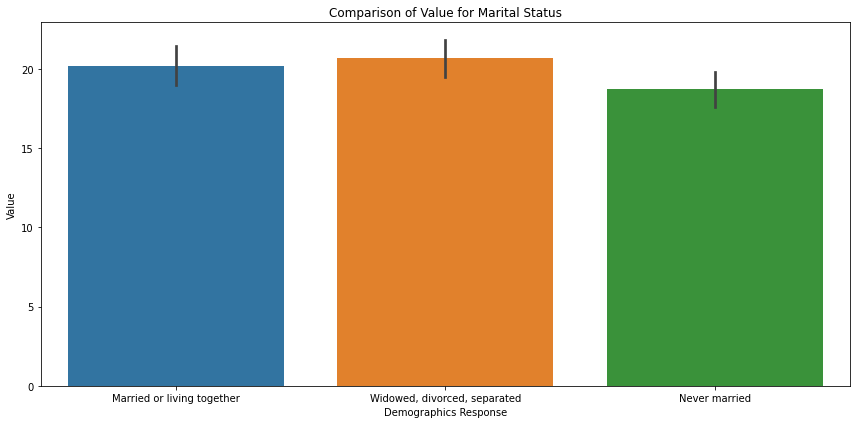

In [55]:
plt.figure(figsize=(12, 6)) 

sns.barplot(data=filtered_df, x='Demographics Response', y='Value') 

plt.title('Comparison of Value for Marital Status')  # Corrected line 

plt.xlabel('Demographics Response') 

plt.ylabel('Value') 

plt.tight_layout() 

plt.show() 

In [56]:
merged_df = violence_sorted.merge(contracept_sorted, on='Country', how='inner') 

In [57]:
print(merged_df.columns) 

Index(['RecordID', 'Country', 'Gender', 'Demographics Question',
       'Demographics Response', 'Question', 'Survey Year', 'Value', 'Religion',
       'Continent', 'Sub-Continent',
       'Percentage distribution of women aged 15-49  (per country)',
       'Pregnancy intention', 'Contraceptive availability',
       'Contraceptive method'],
      dtype='object')


In [58]:
country_count = violence_sorted['Country'].nunique() 

In [59]:
print("Number of unique countries:", country_count)  

Number of unique countries: 70


In [60]:
count_df = merged_df.groupby(["Pregnancy intention", "Religion"]).size().reset_index(name="Count") 

 

In [61]:
not_wanting_to_avoid = count_df[(count_df["Pregnancy intention"] == "Not wanting to avoid pregnancy")] 

wanting_to_avoid = count_df[(count_df["Pregnancy intention"] == "Wanting to avoid pregnancy")] 

In [62]:
sns.set(style="whitegrid") 

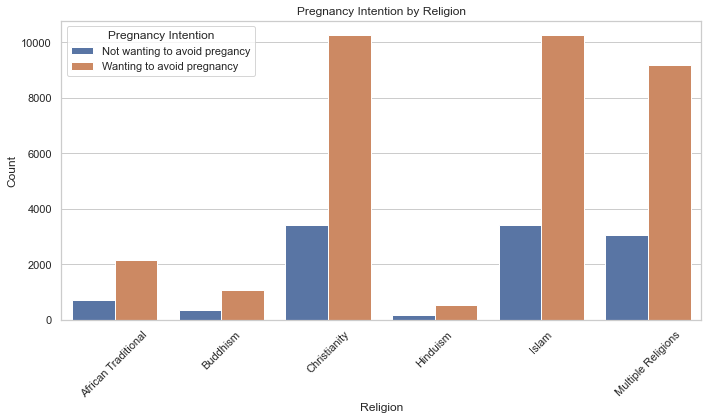

In [63]:
plt.figure(figsize=(10, 6)) 

sns.barplot(x="Religion", y="Count", hue="Pregnancy intention", data=count_df) 

plt.title("Pregnancy Intention by Religion") 

plt.xlabel("Religion") 

plt.ylabel("Count") 

plt.xticks(rotation=45) 

plt.legend(title="Pregnancy Intention") 

plt.tight_layout() 

plt.show() 

In [64]:
count_df = merged_df.groupby(["Contraceptive availability", "Religion"]).size().reset_index(name="Count") 

In [65]:
met_need = count_df[(count_df["Contraceptive availability"] == "Met need")] 

unmet_need = count_df[(count_df["Contraceptive availability"] == "Unmet need")] 

In [66]:
sns.set(style="whitegrid") 

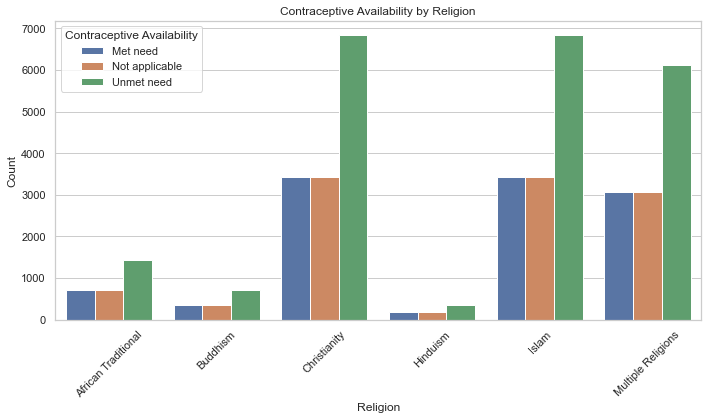

In [67]:
plt.figure(figsize=(10, 6)) 

sns.barplot(x="Religion", y="Count", hue="Contraceptive availability", data=count_df) 

plt.title("Contraceptive Availability by Religion") 

plt.xlabel("Religion") 

plt.ylabel("Count") 

plt.xticks(rotation=45) 

plt.legend(title="Contraceptive Availability") 

plt.tight_layout() 

plt.show() 